# Import the Necessary Libraries & Modules

In [1]:
from data.echogram import DataReaderZarr, get_data_readers
import numpy as np
from tqdm import tqdm
import dask
import pandas as pd
import matplotlib.pyplot as plt
from batch.label_transforms.ahmet_refine_label_boundary import P_refine_label_boundary
from scipy import stats as st
from batch.data_transforms.db_with_limits import db_with_limits, db
from batch.data_transforms.ahmet_db_with_limits import xr_db_with_limits
from batch.samplers.ahmet_background import BackgroundZarr
from utils.ahmet_example_illustr import examp_illustr
from pandas.plotting import scatter_matrix
import xarray as xr
import seaborn as sns

dask.config.set(**{'array.slicing.split_large_chunks': False})

#  Path to surveys
survey_path = 'C:/users/apa055/Desktop/data/'

#  Get list of relevant surveys
surveys = ['2019/S2019847/ACOUSTIC/GRIDDED/S2019847_sv.zarr']
readers = [DataReaderZarr(survey_path + zarr_file) for zarr_file in surveys]

# Or alternatively ...
# readers = get_data_readers()

patch_size = (256, 256)  # x, y

# Coordinates of random Background Samples

In [2]:
survey = [readers[0]]

crdinates = np.zeros((50,2))

for i in tqdm(range(len(crdinates)), total=len(crdinates)):
    crdinates[i, :] = BackgroundZarr(survey).get_sample()[0]

100%|██████████| 50/50 [03:07<00:00,  3.75s/it]


# Save and Load Coordinates

In [3]:
np.savetxt("/Users/apa055/Desktop/NearMiss_UNET/jupyter_notebooks/notebook_outputs/DENEME_coordinates.csv", crdinates, delimiter=",")
cordinates_bg_rand = np.loadtxt('/Users/apa055/Desktop/NearMiss_UNET/jupyter_notebooks/notebook_outputs/DENEME_coordinates.csv', delimiter=",")
cordinates_bg_rand = cordinates_bg_rand.astype('int')

# Example Illustrations

In [ ]:
# Random 3 patch visualization
survey = readers[0]
for i in np.random.randint(0,49,2):
    examp_illustr(survey, x=cordinates_bg_rand[i,0], y=cordinates_bg_rand[i,1])

# Extracting Statistics from the  random bg patches

In [23]:
from utils.ahmet_patch_statistics_extract import GeneratePatchStat
deneme = GeneratePatchStat(readers[0], cordinates_bg_rand, patch_size=(256,256))
deneme.calculate_stats(only_pixel_counts=False)

  0%|          | 0/50 [00:00<?, ?it/s]C:\Anaconda3\lib\site-packages\dask\array\slicing.py:637: RuntimeWarning: overflow encountered in long_scalars
  maxsize = math.ceil(nbytes / (other_numel * itemsize))
  2%|▏         | 1/50 [00:01<01:31,  1.87s/it]C:\Anaconda3\lib\site-packages\dask\array\slicing.py:637: RuntimeWarning: overflow encountered in long_scalars
  maxsize = math.ceil(nbytes / (other_numel * itemsize))
  4%|▍         | 2/50 [00:03<01:26,  1.81s/it]C:\Anaconda3\lib\site-packages\dask\array\slicing.py:637: RuntimeWarning: overflow encountered in long_scalars
  maxsize = math.ceil(nbytes / (other_numel * itemsize))
C:\Users\apa055\Desktop\NearMiss_UNET\utils\ahmet_patch_statistics_extract.py:48: RuntimeWarning: Mean of empty slice
  self.data[i, 2] = mean_Sv = np.nanmean(np_Sv)  # mean (excluding nan)
C:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,x,y,mean_Sv,mode_Sv,std_Sv,0_Sv,25_Sv,50_Sv,75_Sv,95_Sv,...,mean_bg,mode_bg,std_bg,0_bg,25_bg,50_bg,75_bg,95_bg,100_bg,class
0,3302643.0,161.0,-65.607307,-75.0,5.373405,-75.0,-69.534731,-65.117542,-61.558434,-57.380942,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,seabed
1,2582391.0,243.0,-69.636459,-75.0,6.596752,-75.0,-74.871996,-70.569561,-66.823399,-61.548245,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,seabed
2,2080164.0,1272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,background
3,3020612.0,153.0,-64.786545,-75.0,5.662079,-75.0,-68.827105,-64.325607,-60.547950,-56.065547,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,seabed
4,1493658.0,151.0,-69.182999,-75.0,5.580441,-75.0,-75.000000,-69.904385,-64.710754,-59.512825,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,background
5,2597368.0,200.0,-66.956200,-75.0,5.494985,-75.0,-71.541569,-66.831406,-62.803208,-57.899560,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,seabed
6,2070035.0,1492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,background
7,3172396.0,167.0,-67.205551,-75.0,6.548330,-75.0,-75.000000,-67.297108,-61.852839,-56.343697,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,background
8,47449.0,152.0,-71.894081,-75.0,4.413177,-75.0,-75.000000,-75.000000,-69.307510,-63.047989,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,background
9,1514200.0,152.0,-67.784332,-75.0,5.661841,-75.0,-73.225914,-67.902405,-63.549411,-58.141919,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,background


# Patches Data Summary Visualizations

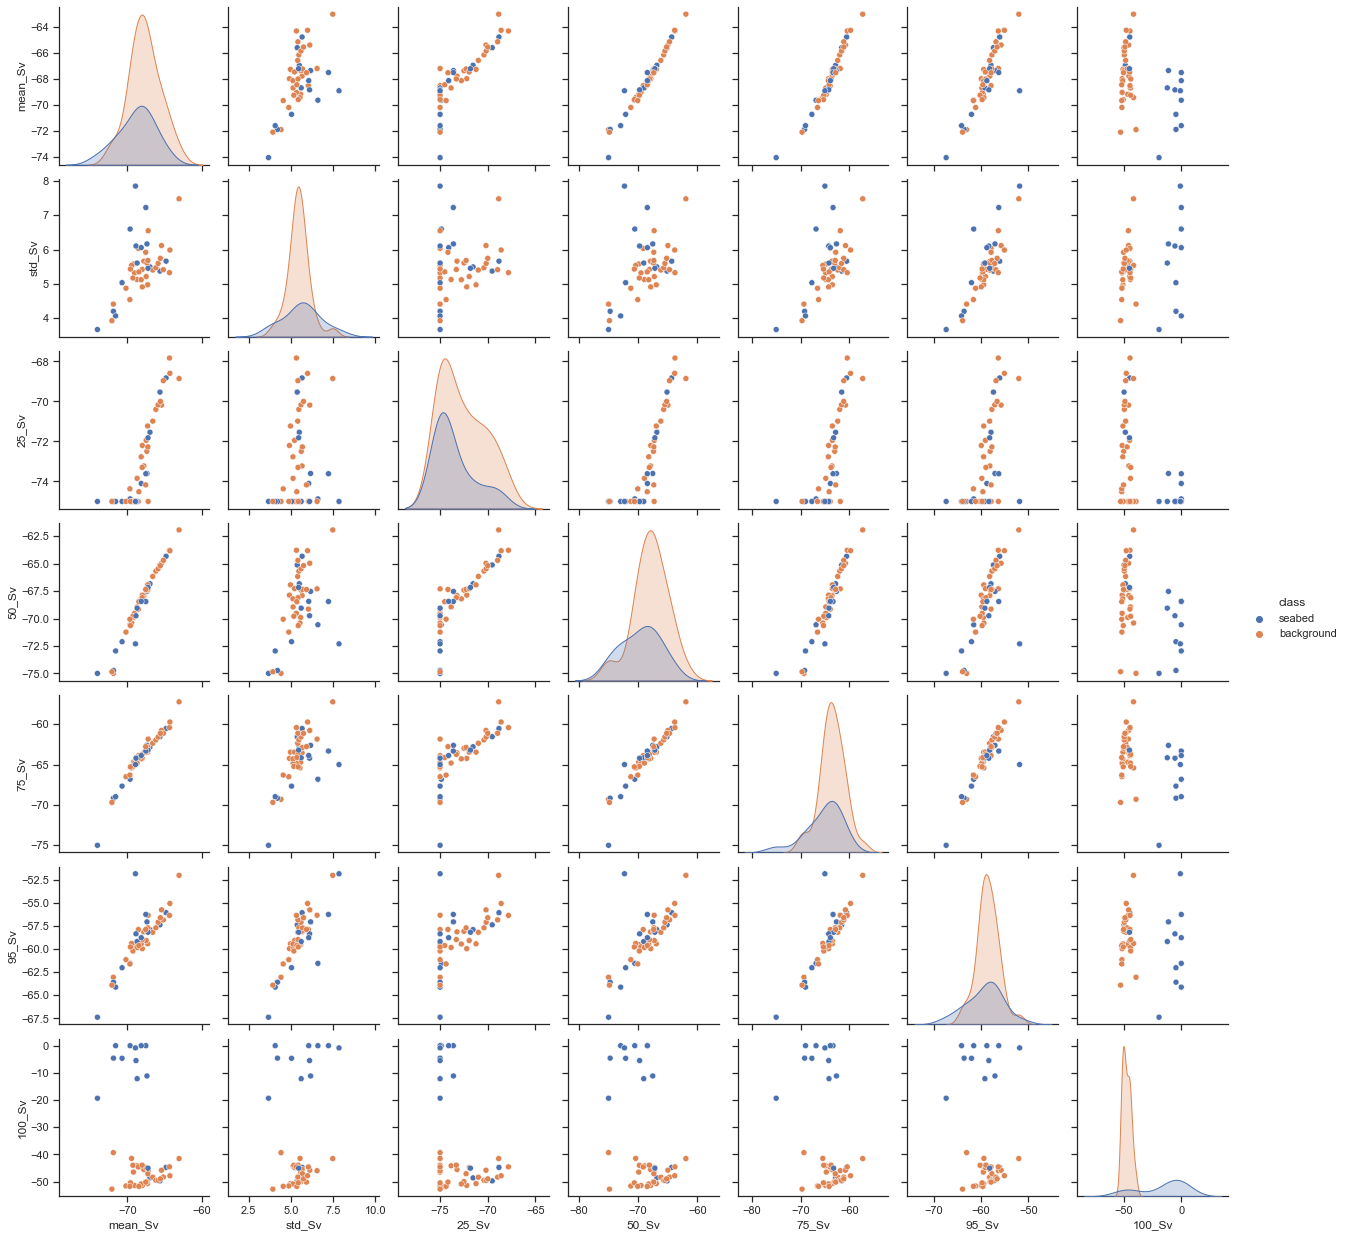

In [24]:
pdata = deneme.stats
sns.set_theme(style="ticks")
columns = ['mean_Sv', 'std_Sv', '25_Sv', '50_Sv', '75_Sv', '95_Sv', '100_Sv', 'class']
filt = (pdata['class'] == 'background') | (pdata['class'] == 'seabed')
sns.pairplot(pdata[filt][columns], hue="class")

# Explanation: The distribution of the patches with only background, and patches containing seabed
# It seems they are distinguishable ( with std, 95% and 100% percentiles)

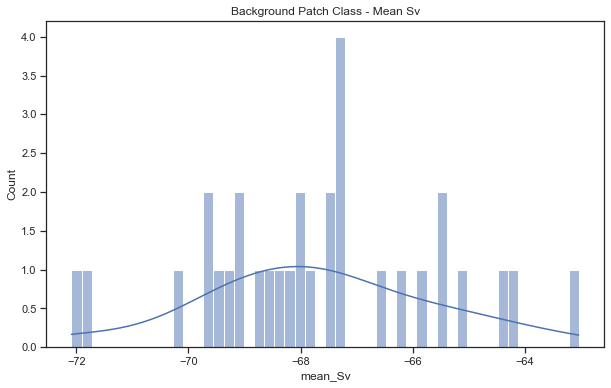

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(pdata[(pdata['class']=='background') & (pdata['nop_nan']==0)]['mean_Sv'], 
             kde=True, stat="count", bins=50)
plt.title('Background Patch Class - Mean Sv')
plt.show()

# Reading Extracted Patch Data (2 patches for each ping)

In [13]:
PSv_data = np.loadtxt('/Users/apa055/Desktop/NearMiss_UNET/jupyter_notebooks/notebook_outputs/Sv_modified_patch_data.csv', delimiter=",")

Ppdata = pd.DataFrame(PSv_data)
names_modified = ['x', 'y', 'mean_Sv', 'mode_Sv', 'std_Sv', 
                  '0_Sv', '25_Sv', '50_Sv', '75_Sv', '95_Sv', '100_Sv',
                  'nop_below_seabed', 'nop_other', 'nop_sandeel', 'nop_possandeel', 'nop_nan','nop_background',
                  'mean_other', 'mode_other', 'std_other',
                  '0_Other', '25_Other', '50_Other', '75_Other', '95_Other', '100_Other',
                  'mean_sandeel', 'mode_sandeel', 'std_sandeel',
                  '0_sandeel', '25_sandeel', '50_sandeel', '75_sandeel', '95_sandeel', '100_sandeel',
                  'mean_psandeel', 'mode_psandeel', 'std_psandeel',
                  '0_psandeel', '25_psandeel', '50_psandeel', '75_psandeel', '95_psandeel', '100_psandeel',
                  'mean_bg', 'mode_bg', 'std_bg',
                  '0_bg', '25_bg', '50_bg', '75_bg', '95_bg', '100_bg']
Ppdata.columns = names_modified
# Class Label Assignment
Ppdata['class'] = 'background'
Ppdata.loc[(Ppdata['nop_other']>0) & (Ppdata['nop_sandeel']==0)
          & (Ppdata['nop_below_seabed']==0), 'class'] = 'other'
Ppdata.loc[(Ppdata['nop_other']==0) & (Ppdata['nop_sandeel']>0)
          & (Ppdata['nop_below_seabed']==0), 'class'] = 'sandeel'
Ppdata.loc[(Ppdata['nop_other']==0) & (Ppdata['nop_sandeel']==0)
          & (Ppdata['nop_below_seabed']>0) & (Ppdata['nop_below_seabed']!=256*256), 'class'] = 'seabed'
Ppdata.loc[(Ppdata['nop_other']==0) & (Ppdata['nop_sandeel']>0)
          & (Ppdata['nop_below_seabed']>0) & (Ppdata['nop_below_seabed']!=256*256), 'class'] = 'seabed_sandeel'
Ppdata.loc[(Ppdata['nop_other']>0) & (Ppdata['nop_sandeel']==0)
          & (Ppdata['nop_below_seabed']>0) & (Ppdata['nop_below_seabed']!=256*256), 'class'] = 'seabed_other'
Ppdata.loc[(Ppdata['nop_other']>0) & (Ppdata['nop_sandeel']>0)
          & (Ppdata['nop_below_seabed']==0), 'class'] = 'sandeel_other'
Ppdata.loc[(Ppdata['nop_other']>0) & (Ppdata['nop_sandeel']>0)
          & (Ppdata['nop_below_seabed']>0) & (Ppdata['nop_below_seabed']!=256*256), 'class'] = 'seabed_sandeel_other'


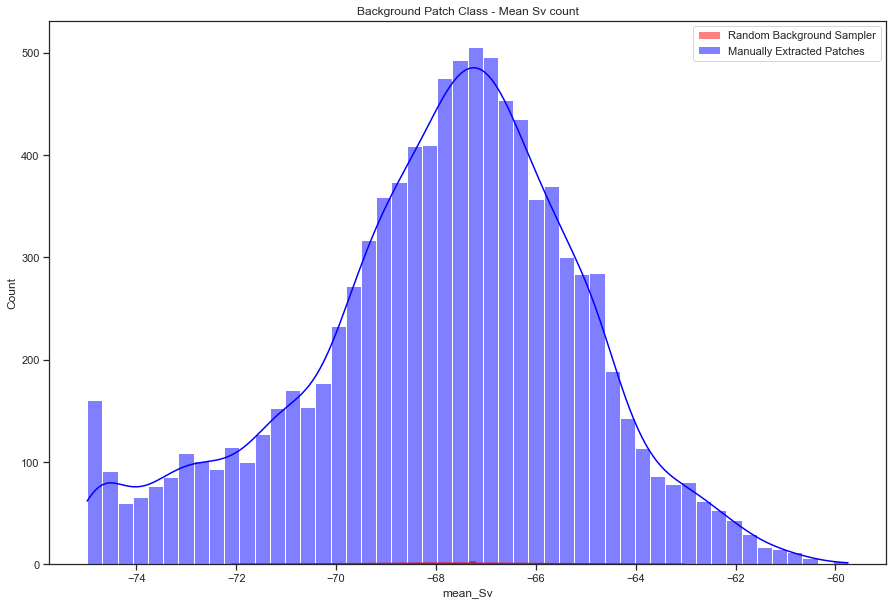

In [14]:
stat = 'count'
plt.figure(figsize=(15,10))
sns.histplot(pdata.mean_Sv[(pdata['class']=='background') & (pdata['nop_nan']==0)], 
             kde=True, color='red', bins=50, stat=stat, label='Random Background Sampler')
sns.histplot(Ppdata.mean_Sv[(Ppdata['class']=='background') & (Ppdata['nop_nan']==0)], 
             kde=True, color='blue', bins=50, stat=stat, label='Manually Extracted Patches')
plt.title(f'Background Patch Class - Mean Sv {stat}')
plt.legend()
plt.show()

In [32]:
np.random.randint(0, 9000, 5000)

array([ 602, 3302, 5698, ..., 2855,  359, 6812])

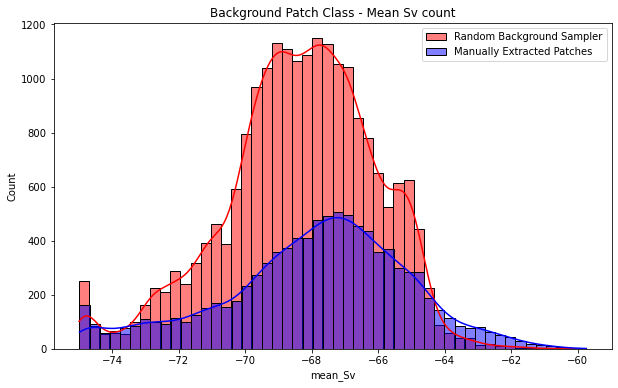

In [38]:
stat = 'count'
plt.figure(figsize=(10,6))
sns.histplot(pdata.mean_Sv[(pdata['class']=='background') & (pdata['nop_nan']==0)], 
             kde=True, color='red', bins=50, stat=stat, label='Random Background Sampler')
sns.histplot(Ppdata.mean_Sv[(Ppdata['class']=='background') & (Ppdata['nop_nan']==0)], 
             kde=True, color='blue', bins=50, stat=stat, label='Manually Extracted Patches')
plt.title(f'Background Patch Class - Mean Sv {stat}')
plt.legend()
plt.show()

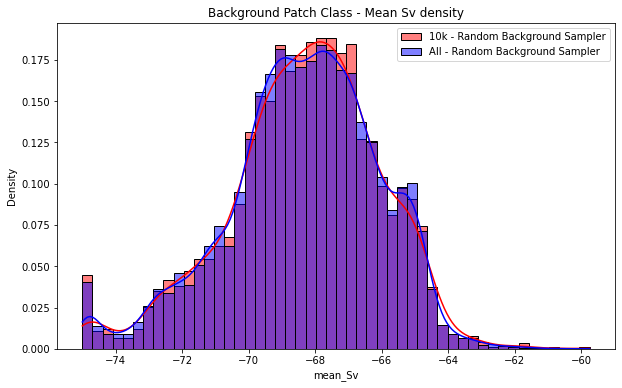

In [27]:
stat = 'density'
plt.figure(figsize=(10,6))
sns.histplot(pdata.mean_Sv[(pdata['class']=='background') & (pdata['nop_nan']==0)].iloc[0:3000], 
             kde=True, color='red', bins=50, stat=stat, label='10k - Random Background Sampler')
sns.histplot(pdata.mean_Sv[(pdata['class']=='background') & (pdata['nop_nan']==0)], 
             kde=True, color='blue', bins=50, stat=stat, label='All - Random Background Sampler')

plt.title(f'Background Patch Class - Mean Sv {stat}')
plt.legend()
plt.show()

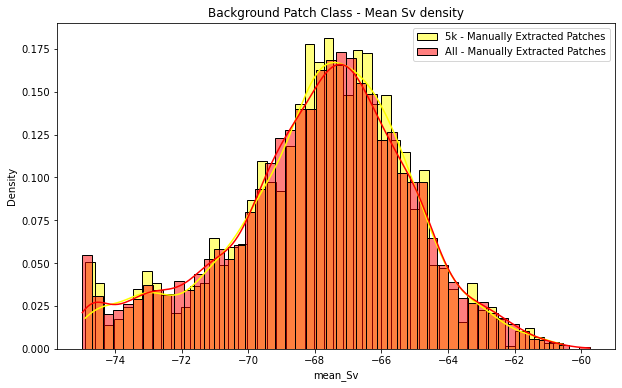

In [36]:
stat = 'density'
plt.figure(figsize=(10,6))
sns.histplot(Ppdata.mean_Sv[(Ppdata['class']=='background') & (Ppdata['nop_nan']==0)].iloc[np.random.randint(0, 9000, 2000)], 
             kde=True, color='yellow', bins=50, stat=stat, label='5k - Manually Extracted Patches')
sns.histplot(Ppdata.mean_Sv[(Ppdata['class']=='background') & (Ppdata['nop_nan']==0)], 
             kde=True, color='red', bins=50, stat=stat, label='All - Manually Extracted Patches')
plt.title(f'Background Patch Class - Mean Sv {stat}')
plt.legend()
plt.show()

In [206]:
!python background.py

Traceback (most recent call last):
  File "background.py", line 20, in <module>
    from utils.np import getGrid, nearest_interpolation
ModuleNotFoundError: No module named 'utils'


In [17]:
pdata[pdata.nop_nan == 0]['class'].value_counts()

background    20460
seabed        10218
Name: class, dtype: int64